In [1]:
import torch

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla P100-PCIE-16GB


#prepare an Excel file
N= 100, x=-5000 ~ 5000, step 100, y=3*x^2 + 25*x + 580

In [3]:
from google.colab import files
uploaded = files.upload()

Saving MLP regression data.xlsx to MLP regression data (2).xlsx


In [4]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

MLP regression data.xlsx


In [5]:
import pandas as pd
df=pd.read_excel(fname)

In [6]:
df.head(5)

,x,y
0,-5000,74875580
1,-4900,71908080
2,-4800,69000580
3,-4700,66153080
4,-4600,63365580


In [7]:
df.columns

Index(['x', 'y'], dtype='object')

#Pick 30 data (20 to train and 10 to test) randomly

In [8]:
dfX = df[['x']]
dfY = df[['y']]

In [9]:
import numpy as np
numpyX = np.array(dfX.values)
numpyY = np.array(dfY.values)

In [10]:
index = np.random.choice(numpyX.shape[0], 30, replace=False)  

In [11]:
numpyX1 = numpyX[index]
numpyY1 = numpyY[index]

In [12]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY_hat, testY_hat = train_test_split(numpyX1, numpyY1, test_size=0.30, random_state=0)
print(trainX.shape, testX.shape, trainY_hat.shape, testY_hat.shape)

(21, 1) (9, 1) (21, 1) (9, 1)


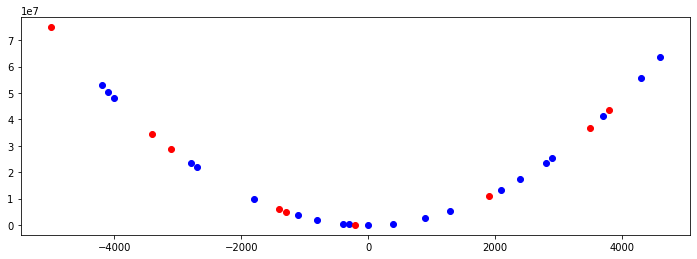

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.scatter(trainX, trainY_hat, color = "blue")
plt.scatter(testX, testY_hat, color = "red")
plt.show()

# Build NN

In [14]:
import torch.nn as nn

In [32]:
MyNet = nn.Sequential(
    nn.Linear(1, 30),
    nn.ReLU(),
    nn.Linear(30, 15),
    nn.ReLU(),
    nn.Linear(15, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=1, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=1, bias=True)
)


In [33]:
from torchsummary import summary
summary(MyNet, input_size=(21, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 21, 30]              60
              ReLU-2               [-1, 21, 30]               0
            Linear-3               [-1, 21, 15]             465
              ReLU-4               [-1, 21, 15]               0
            Linear-5                [-1, 21, 1]              16
Total params: 541
Trainable params: 541
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [34]:
loss_func = torch.nn.MSELoss()

In [35]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005)

# Train N epoches

In [36]:
tensorX = torch.FloatTensor(trainX).to(device)
tensorY_hat = torch.FloatTensor(trainY_hat).to(device)

In [37]:
lossLst = []
for epoch in range(1, 5000):
    tensorY = MyNet(tensorX)
    loss = loss_func(tensorY_hat, tensorY)
    loss1 = float(loss)
    #print("%.2f" % (loss1), end = ", ")
    lossLst.append(loss1)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

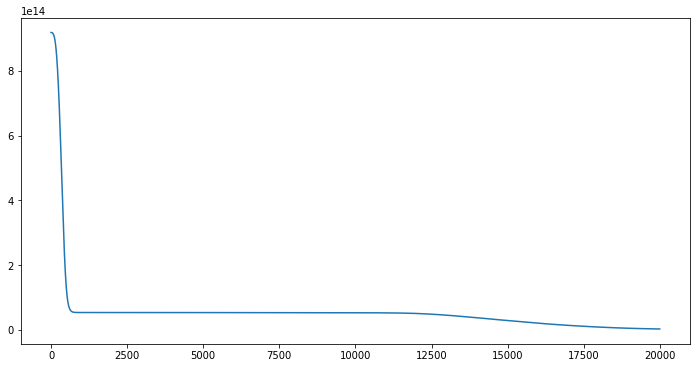

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()

##Training data performance

In [39]:
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)))

2235052851200.00


In [40]:
trainY = tensorY.detach().cpu().numpy()

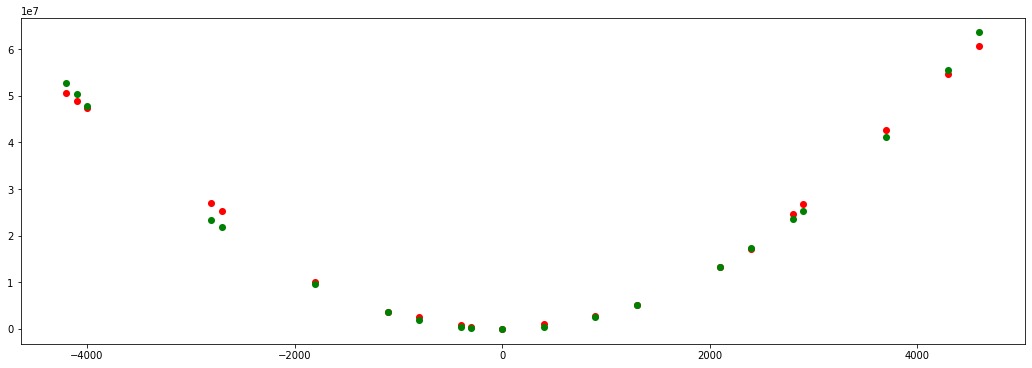

In [41]:
plt.figure(figsize=(18, 6))
plt.scatter(trainX, trainY, s=50, lw=0, color="red")
plt.scatter(trainX, trainY_hat, s=50, lw=0, color="green")
plt.show()

# Test 

In [42]:
tensorX = torch.FloatTensor(testX).to(device)
tensorY_hat = torch.FloatTensor(testY_hat).to(device)
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)))

16866413117440.00


In [43]:
testY = tensorY.detach().cpu().numpy()

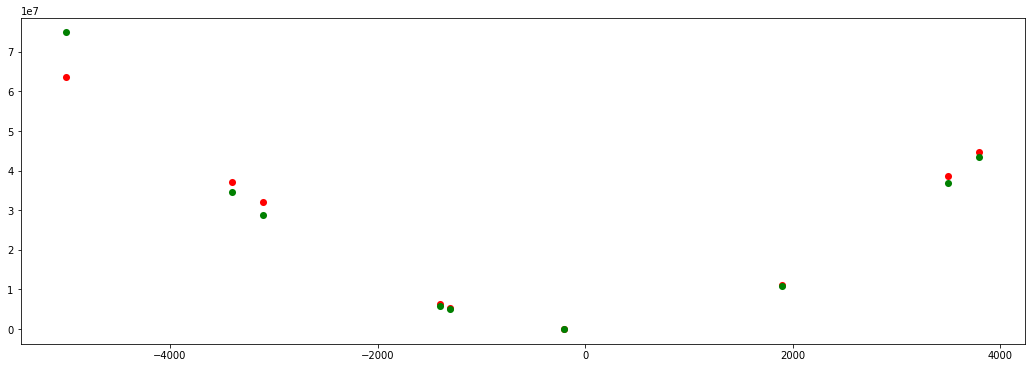

In [44]:
plt.figure(figsize=(18, 6))
plt.scatter(testX, testY, s=50, lw=0, color="red")
plt.scatter(testX, testY_hat, s=50, lw=0, color="green")
plt.show()